In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [17]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

In [19]:
df.head(11)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1
5,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1
6,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1
7,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1
8,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1
9,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1


In [21]:
df.tail(11)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11131,7,TRANSFER,1298848.87,C1053035032,8439.13,0.00,C1787868648,1519512.39,15100000.00,0
11132,7,TRANSFER,731485.29,C751320808,0.00,0.00,C801142660,3504660.25,16400000.00,0
11133,7,TRANSFER,2943845.35,C1360289756,0.00,0.00,C1262822392,18000000.00,22600000.00,0
11134,7,TRANSFER,2861134.92,C1326904973,0.00,0.00,C991505714,5352935.74,14000000.00,0
11135,7,TRANSFER,80485.60,C1369223613,0.00,0.00,C465257140,1078685.56,1761413.49,0
11136,7,TRANSFER,19991.02,C1020193304,0.00,0.00,C1915624447,21586.00,17795.02,0
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [23]:
df.type

0        TRANSFER
1        CASH_OUT
2        TRANSFER
3        CASH_OUT
4        TRANSFER
           ...   
11137       DEBIT
11138    CASH_OUT
11139    CASH_OUT
11140     PAYMENT
11141     PAYMENT
Name: type, Length: 11142, dtype: object

In [27]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [31]:
df.duplicated().sum()

0

In [33]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64


Fraud distribution (percentage):
isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64


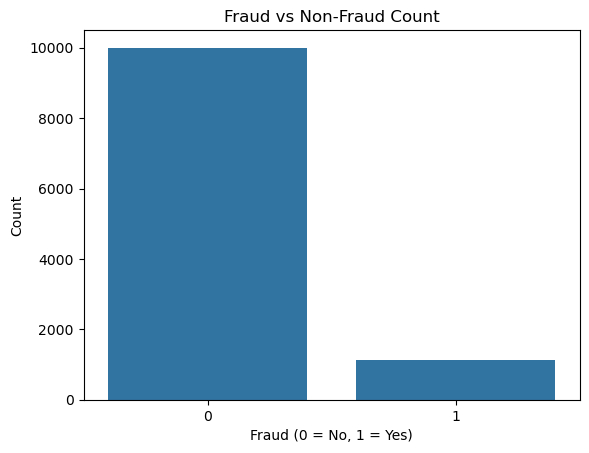

In [35]:
fraud_counts = df['isFraud'].value_counts(normalize=True) * 100
print("\nFraud distribution (percentage):")
print(fraud_counts)
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Count')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [37]:
type_fraud = df.groupby('type')['isFraud'].mean()
print("Fraud rates by transaction type:")
print(type_fraud)

Fraud rates by transaction type:
type
CASH_IN     0.000000
CASH_OUT    0.308926
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.385246
Name: isFraud, dtype: float64


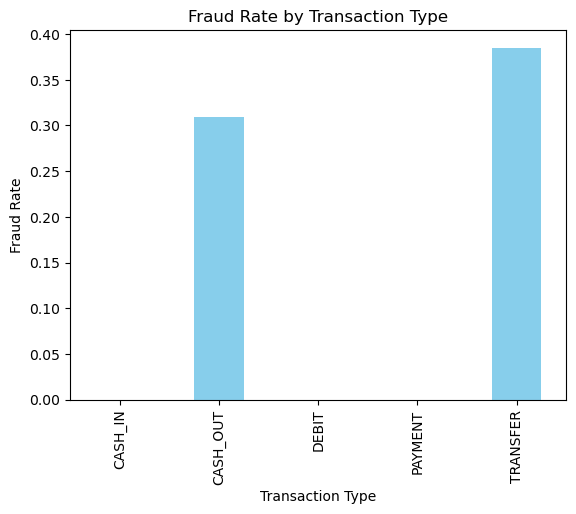

In [43]:
type_fraud.plot(kind='bar', title='Fraud Rate by Transaction Type', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

df['orig_balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']


In [59]:
if 'timestamp' in df.columns:
    df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

In [61]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_encoded',
            'orig_balance_change', 'dest_balance_change']
X = df[features]
y = df['isFraud']

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [89]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)  
logistic_model.fit(X_train, y_train)  

LogisticRegression(max_iter=1000)

In [142]:
y_pred_logistic = logistic_model.predict(X_test)  
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))  
roc_auc_logistic = roc_auc_score(y_test, y_pred_logistic)  
print(f'ROC-AUC Score for Logistic Regression: {roc_auc_logistic:.2f}')  

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       0.96      0.92      0.94       230

    accuracy                           0.99      2229
   macro avg       0.98      0.96      0.97      2229
weighted avg       0.99      0.99      0.99      2229

ROC-AUC Score for Logistic Regression: 0.96


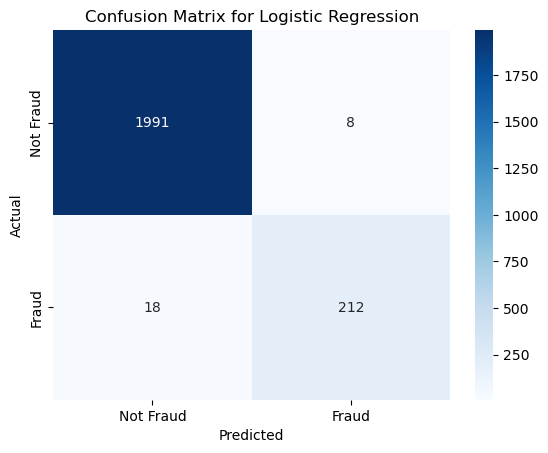

In [97]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)  
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])  
plt.title('Confusion Matrix for Logistic Regression')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()  


In [99]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, auc
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))
    f1 = f1_score(y_test, preds)
    results[name] = {'ROC-AUC': roc_auc, 'F1-Score': f1}
    print(f"{name} Model:\n")
    print(classification_report(y_test, preds))

Random Forest Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.96      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Gradient Boosting Model:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.95      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [119]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
gs_rf.fit(X_train, y_train)

best_rf = gs_rf.best_estimator_
print(f"Best Random Forest parameters: {gs_rf.best_params_}")

Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [121]:
final_preds = best_rf.predict(X_test)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, final_preds)
print(f"Final Random Forest ROC-AUC: {roc_auc}")
print(f"Final Random Forest F1-Score: {f1}")
print(classification_report(y_test, final_preds))

Final Random Forest ROC-AUC: 0.9996998499249625
Final Random Forest F1-Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.96      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



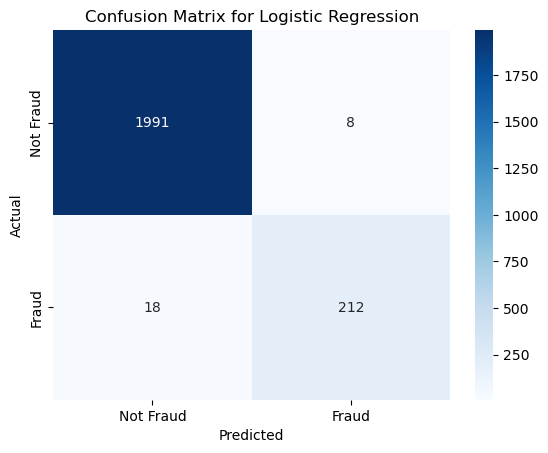

In [122]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)  
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])  
plt.title('Confusion Matrix for Logistic Regression')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show()  


In [137]:
def financial_impact_analysis(y_true, y_pred):
    total_transactions = len(y_true)
    total_fraudulent_transactions = sum(y_true)
    total_detected_frauds = sum(y_pred)
    
    revenue_loss_per_fraud = total_detected_frauds * average_loss_per_fraud
    
    print(f'Total Transactions: {total_transactions}')
    print(f'Total Fraudulent Transactions: {total_fraudulent_transactions}')
    print(f'Total Detected Frauds: {total_detected_frauds}')
    print(f'Estimated Revenue Loss from Fraud Detection: ${revenue_loss_per_fraud:.2f}')

average_loss_per_fraud = df[df['isFraud'] == 1]['amount'].mean() if not df[df['isFraud'] == 1].empty else 0

financial_impact_analysis(y_test, y_pred_logistic)


Total Transactions: 2229
Total Fraudulent Transactions: 230
Total Detected Frauds: 220
Estimated Revenue Loss from Fraud Detection: $262378365.06
